# Bike Sharing Assignment

```
By CodeMaverick (Sujeet Karnik)
```



## Problem Statement and Business Goals

**Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Business Goal**

The business requeuires to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Data Loading and Understanding

In [2]:
#Read the csv file
bikesharing_df = pd.read_csv('https://raw.githubusercontent.com/codemaverick77/ColabData/main/day.csv')

In [3]:
#Read Top 5 rows
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#find information of dataframe shape
bikesharing_df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Description of Dataframe data
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# summarising number of missing values in each column
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 2: EDA / Data Visualization

#### Step 2.1: Drop unwanted columns

In [8]:
#Removing columns as per data dictionary which wont make sense from analysis perspective
# Cnt = Casual + Registered hence no point of having those columns
# istant is a primary key which is not needed
cols_del = ['instant', 'casual', 'registered']

bikesharing_df.drop(cols_del, axis = 1, inplace = True)

bikesharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bikesharing_df.shape

(730, 13)

#### Step 2.2: Changing column values

In [10]:
# Changing to meaningful season values
bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

# Changing to meaningful weather situations values
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy - Good
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - Moderate
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - Bad
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Severe
bikesharing_df.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)

# Changing to meaningful month names
bikesharing_df.mnth = bikesharing_df.mnth.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Changing to meaningful weekdays
bikesharing_df.weekday = bikesharing_df.weekday.replace({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Changing to meaningful season values
bikesharing_df.yr.replace({0:2018, 1:2019},inplace = True)

bikesharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,Jan,0,Mon,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,Jan,0,Tues,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,Jan,0,Thurs,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Print number of unique values in all columns
bikesharing_df.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Step 2.3: Data Visualization

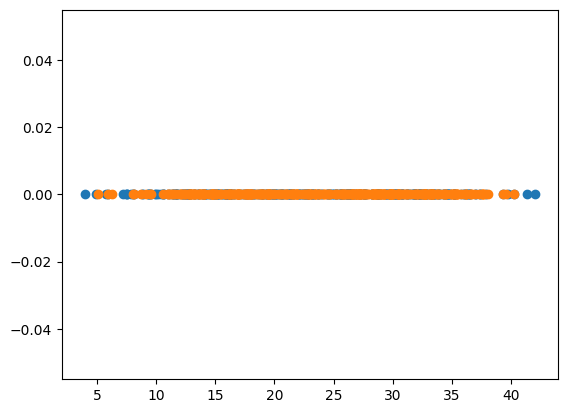

In [12]:
df_2018 = bikesharing_df.loc[bikesharing_df['yr'] == 2018]
df_2019 = bikesharing_df.loc[bikesharing_df['yr'] == 2019]
plt.plot(df_2018['atemp'], np.zeros_like(df_2018['atemp']), 'o')
plt.plot(df_2019['atemp'], np.zeros_like(df_2019['atemp']), 'o')
plt.show()

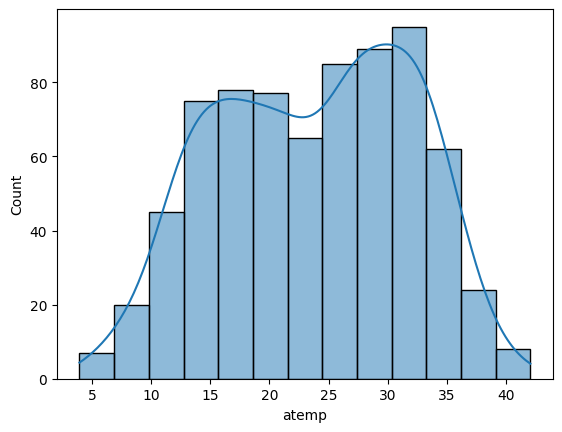

In [13]:
# temperature
sns.histplot(bikesharing_df['atemp'], kde = True)
plt.show()

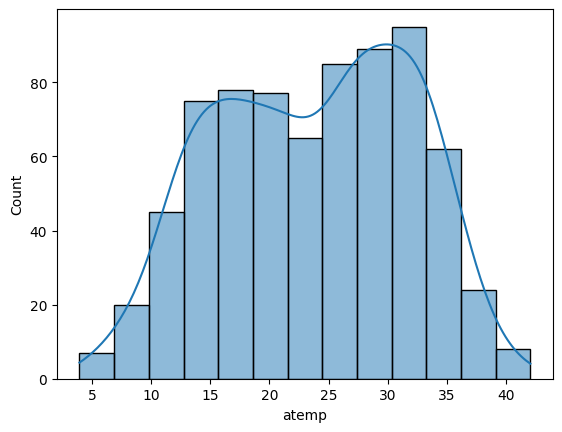

In [14]:
# atemperature
sns.histplot(bikesharing_df['atemp'], kde = True)
plt.show()

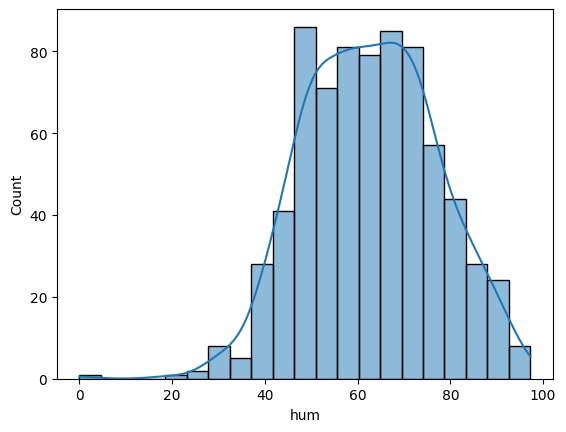

In [15]:
# humidity
sns.histplot(bikesharing_df['hum'], kde = True)
plt.show()

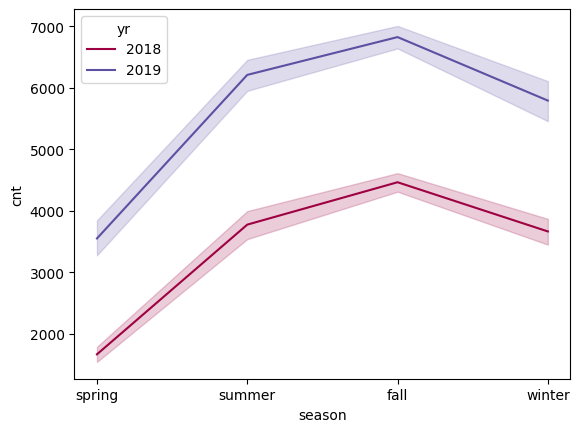

In [16]:
# plotting rentals across season
sns.lineplot(x = 'season', y = 'cnt', data = bikesharing_df, hue = 'yr', palette = 'Spectral')
plt.show()

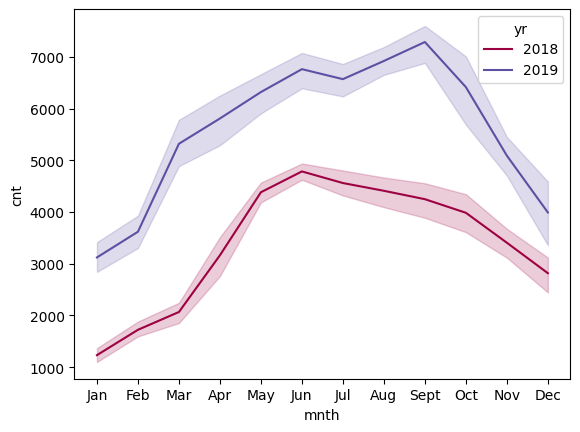

In [17]:
# plotting rentals across months
sns.lineplot(x = 'mnth', y = 'cnt', data = bikesharing_df, hue = 'yr', palette = 'Spectral')
plt.show()

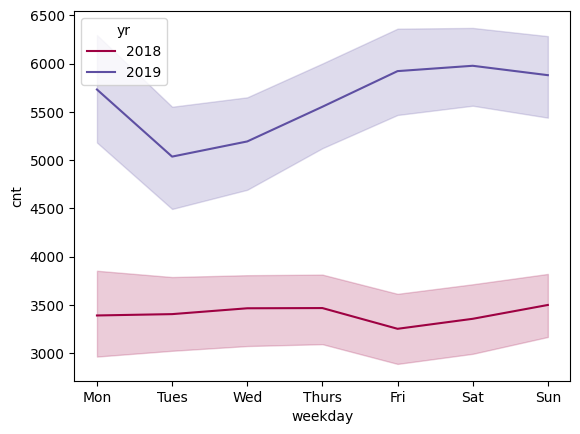

In [18]:
# plotting rentals across weekdays
sns.lineplot(x = 'weekday', y = 'cnt', data = bikesharing_df, hue = 'yr', palette = 'Spectral')
plt.show()

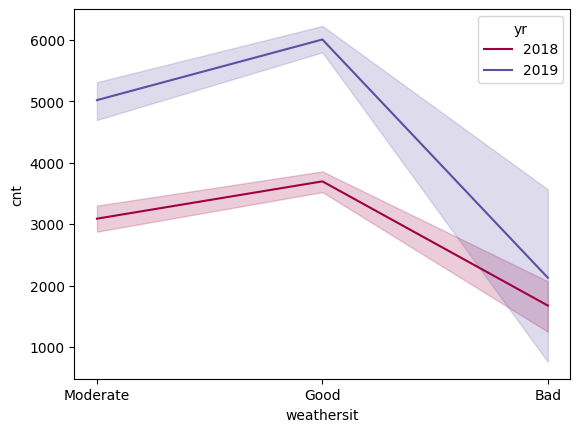

In [19]:
# plotting rentals across weekdays
sns.lineplot(x = 'weathersit', y = 'cnt', data = bikesharing_df, hue = 'yr', palette = 'Spectral')
plt.show()

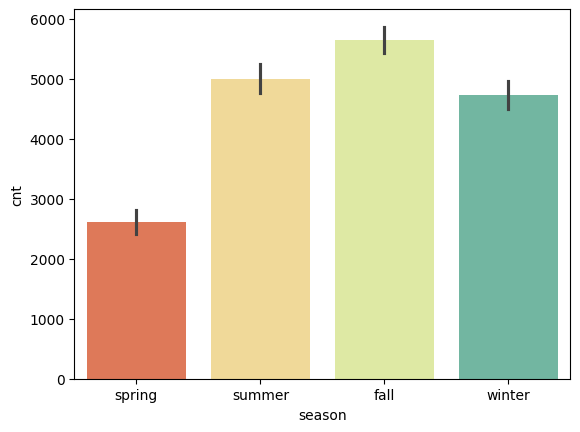

In [20]:
# plotting rentals across seasons
#sns.color_palette("hls", 8)
sns.barplot(x = 'season', y = 'cnt', data = bikesharing_df, hue = 'season', palette="Spectral")
plt.show()

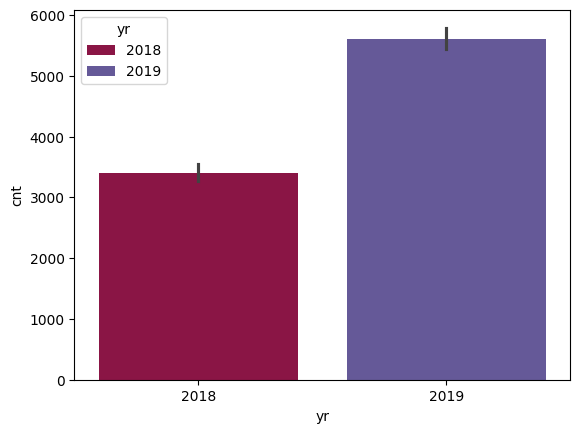

In [21]:
# plotting rentals across years
sns.barplot(x = 'yr', y = 'cnt', data = bikesharing_df, hue = 'yr', palette="Spectral")
plt.show()

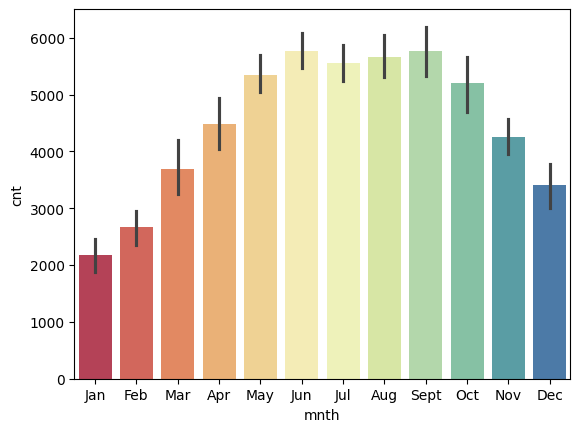

In [22]:
# plotting rentals across months
sns.barplot(x = 'mnth', y = 'cnt', data = bikesharing_df, hue = 'mnth', palette = 'Spectral')
plt.show()

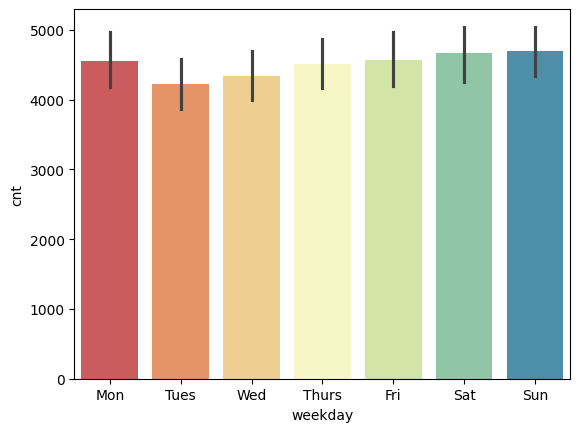

In [23]:
# plotting rentals across weekdays
sns.barplot(x = 'weekday', y = 'cnt', data = bikesharing_df, hue = 'weekday', palette = 'Spectral')
plt.show()

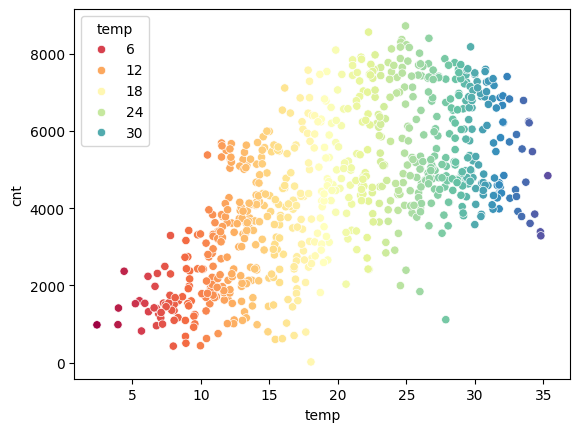

In [24]:
# plotting rentals across temperatures
sns.scatterplot(x = 'temp', y = 'cnt', data = bikesharing_df, hue = 'temp', palette = 'Spectral')
plt.show()

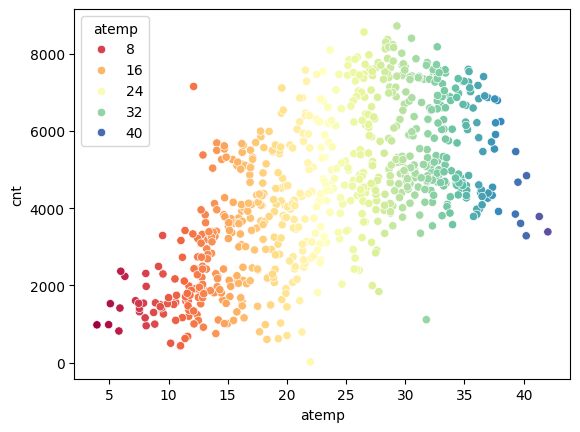

In [25]:
# plotting rentals across feels like temperatures
sns.scatterplot(x = 'atemp', y = 'cnt', data = bikesharing_df, hue = 'atemp', palette = 'Spectral')
plt.show()

In [26]:
# Let's drop the first column from status df using 'drop_first = True'
seasons = pd.get_dummies(bikesharing_df['season'], drop_first = True)

<ipython-input-27-2510c8f628c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bikesharing_df.corr()


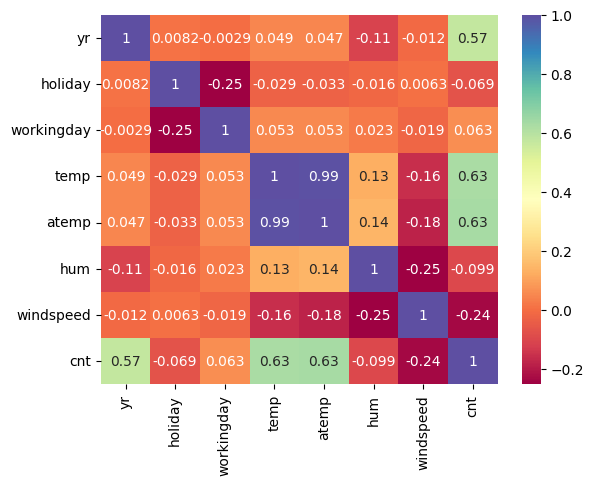

In [27]:
#Correlations for numeric variables
corr = bikesharing_df.corr()
sns.heatmap(corr, cmap="Spectral", annot = True)
plt.show()

From the above heatmap "temp" and "atemp" seems to be highly correlated

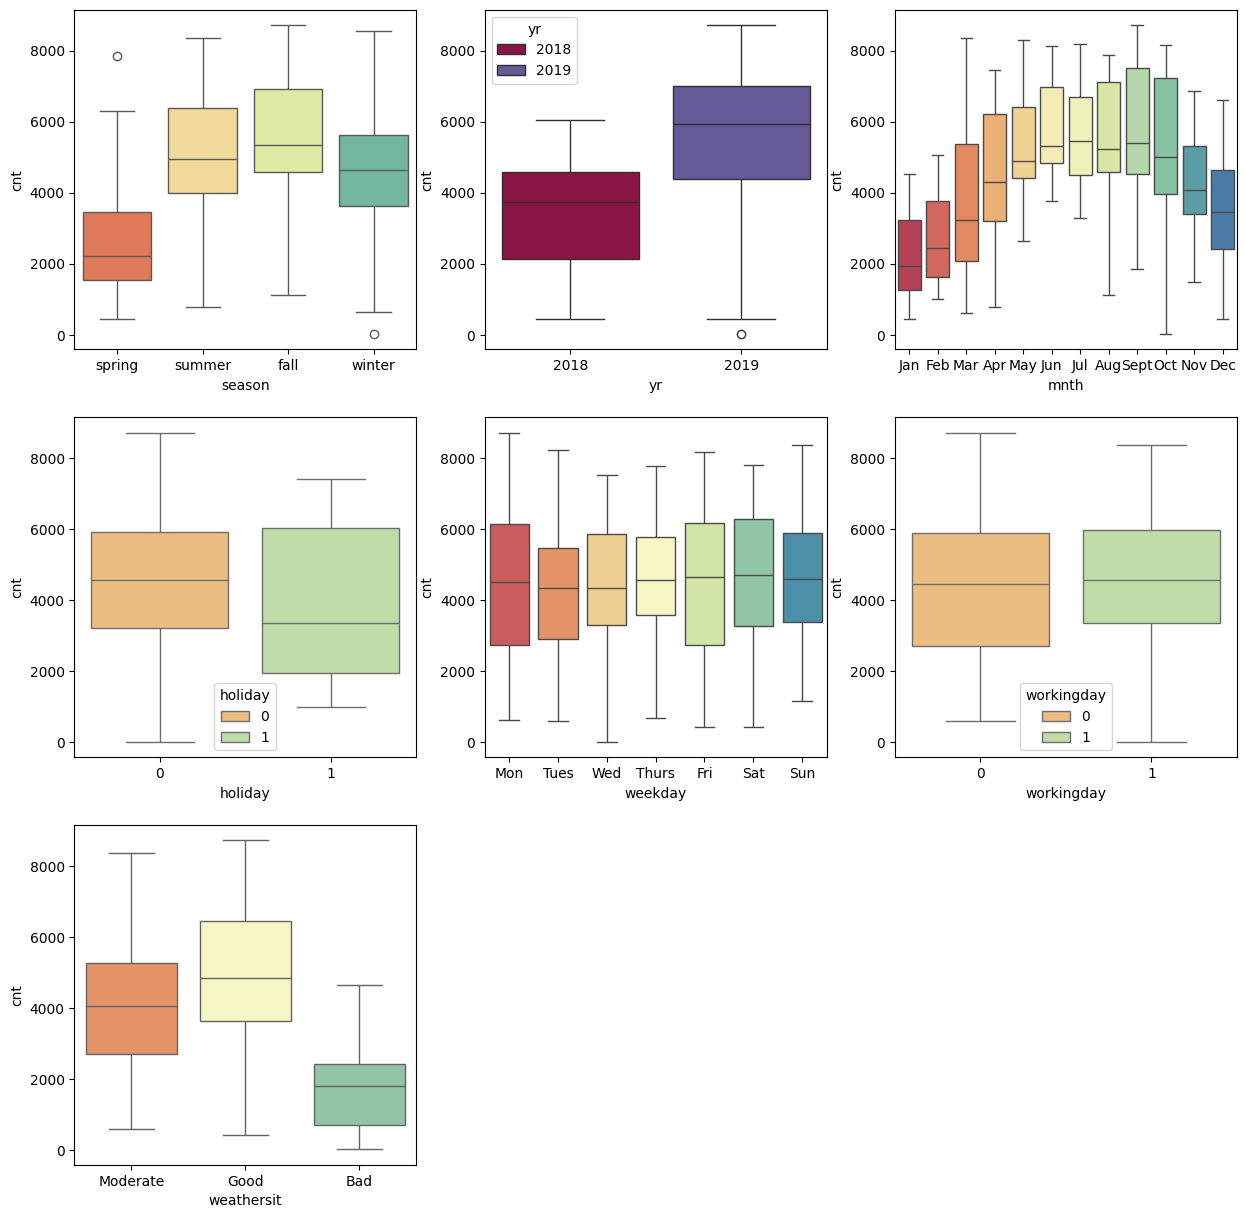

In [28]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing_df, x=i[1], y='cnt', hue = i[1], palette='Spectral')
plt.show()

In [29]:
# Converting "casual","registered" and "cnt" numeric variables to float.
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["cnt"]

for var in IntVariableList:
    bikesharing_df[var] = bikesharing_df[var].astype("float")

In [30]:
# All numeric variables in the dataset
bikesharing_num_df = bikesharing_df.select_dtypes(include=['float64'])
bikesharing_num_df.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


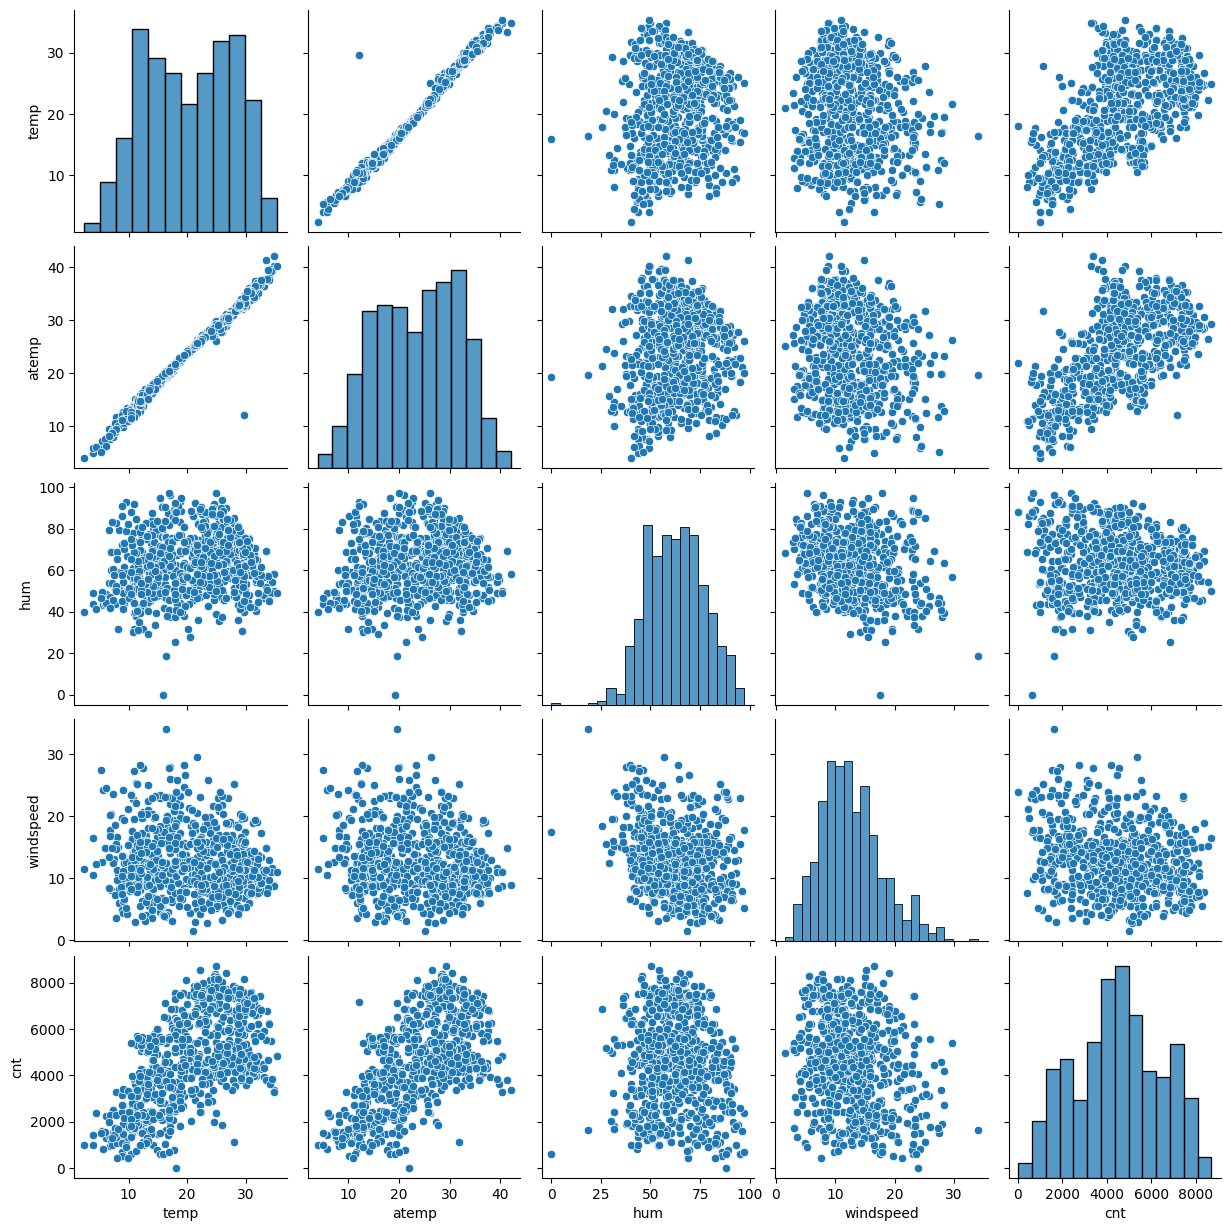

In [31]:
# Pairwise scatter plot
sns.pairplot(bikesharing_num_df)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [32]:
# Correlation matrix
corr1 = bikesharing_num_df.corr()
corr1

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


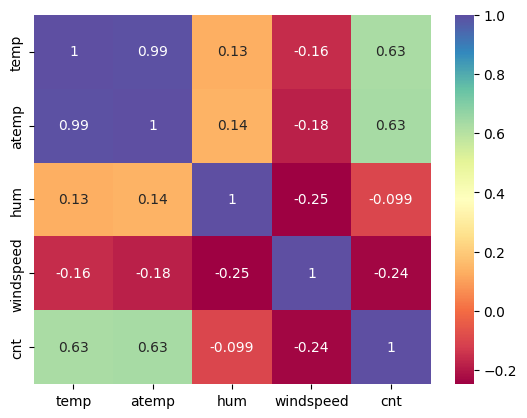

In [33]:
sns.heatmap(corr1, cmap="Spectral", annot = True)
plt.show()

**Observations**
*   Variables 'temp' and 'atemp' are highly correlated
*   Variable 'cnt' and 'windspeed', 'cnt' and 'hum' are negatively correlated



In [34]:
#removing atemp as it is highly correlated with temp
bikesharing_df.drop('atemp',axis=1,inplace=True)

In [35]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


## Step 3: Data Preparation

Preparing the data to build the model.
*   As the visualization is done, and there are only two values for years changing it back to 0 and 1
*   Not considering 'yr', 'holiday' and 'workingday' for dummy variables

### Step 3.1: Dummy Variables

In [36]:
# As there are only two years changing to original format so that constant is not a larger value
bikesharing_df.yr.replace({2018:0, 2019:1},inplace = True)

In [37]:
# Subset all categorical variables
bikesharing_category_df = bikesharing_df.select_dtypes(include=['object'])

In [38]:
bikesharing_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      730 non-null    object
 1   season      730 non-null    object
 2   mnth        730 non-null    object
 3   weekday     730 non-null    object
 4   weathersit  730 non-null    object
dtypes: object(5)
memory usage: 28.6+ KB


In [39]:
category_df = bikesharing_category_df[["season", "mnth", "weekday", "weathersit"]]

In [40]:
bikesharing_dummy_df = pd.get_dummies(category_df, drop_first=True)
bikesharing_dummy_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Drop categorical variable columns
bikesharing_df = bikesharing_df.drop(list(bikesharing_category_df.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
bikesharing_df = pd.concat([bikesharing_df, bikesharing_dummy_df], axis=1)

In [43]:
# Check data from first 5 rows
bikesharing_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4: Model Building

### Step 4.1: Creating Training and Testing sets

In [44]:
# Split the dataframe into train and test sets
df_train, df_test = train_test_split(bikesharing_df, train_size=0.70, test_size=0.30, random_state=50)

In [45]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
707,1,0,0,15.750847,90.5417,10.584325,3228.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
172,0,0,1,30.066653,70.7500,11.541554,4507.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,9.566653,49.8750,10.583521,1248.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,34.030000,55.0833,11.334457,3606.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
182,0,0,0,30.271653,44.4583,7.709154,5119.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,13.495847,59.4583,14.791925,2132.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
132,0,0,1,21.012500,86.3333,12.041575,4105.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
289,0,0,1,21.900847,57.9583,11.750393,4570.0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
109,0,0,1,24.395000,61.4167,16.208975,3944.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Since we have completed the test-train separation, it is necessary to normalize the variables for better understanding. However, only numerical columns should be scaled and not dummy ones. Now let us revisit the original list of numeric variables that was made. Additionally, scaling must occur on training datasets alone to prevent any learning from taking place in the testing sets.

We will be using MinMaxScaler to scale all these columns.

In [46]:
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
707,1,0,0,0.417140,0.933018,0.243629,0.368845,0,0,1,...,0,0,0,0,0,0,1,0,0,1
172,0,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0.223565,0.513954,0.243603,0.141049,1,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,0,0,0,1,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0.346555,0.612709,0.379542,0.242752,1,0,0,...,0,0,1,0,0,0,0,0,1,0
132,0,0,1,0.581838,0.889652,0.290701,0.469742,0,1,0,...,0,0,0,0,1,0,0,0,0,1
289,0,0,1,0.609645,0.597251,0.281295,0.523240,0,0,1,...,1,0,0,0,0,0,0,1,1,0
109,0,0,1,0.687715,0.632890,0.425316,0.451220,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.086275,0.064706,0.135294,0.145098,0.143137,0.149020,0.135294,0.152941,0.627451,0.341176
std,0.500179,0.151726,0.456092,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.281045,0.246248,0.342373,0.352545,0.350557,0.356457,0.342373,0.360284,0.483958,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_test[var] = scaler.fit_transform(df_test[var])

In [51]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
333,0,0,1,0.297810,0.464191,0.632933,0.362652,0,0,1,...,0,0,0,0,0,0,0,0,1,0
203,0,0,0,0.983645,0.295119,0.276893,0.320351,0,0,0,...,0,0,1,0,0,0,0,0,1,0
279,0,0,1,0.540959,0.569862,0.000000,0.539592,0,0,1,...,1,0,0,0,1,0,0,0,1,0
483,1,0,0,0.472266,0.425031,0.240477,0.709698,0,1,0,...,0,0,0,0,0,0,1,0,1,0
267,0,0,0,0.702333,0.809794,0.071208,0.542817,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0,0,0,0.784109,0.549349,0.246837,0.556874,0,1,0,...,0,0,1,0,0,0,0,0,1,0
574,1,0,0,0.816820,0.479731,0.376566,0.747485,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.896416,0.432490,0.232600,0.697704,0,1,0,...,0,0,0,0,0,0,0,0,1,0
290,0,0,1,0.569309,0.595968,0.223122,0.509028,0,0,1,...,1,0,0,0,0,1,0,0,0,1


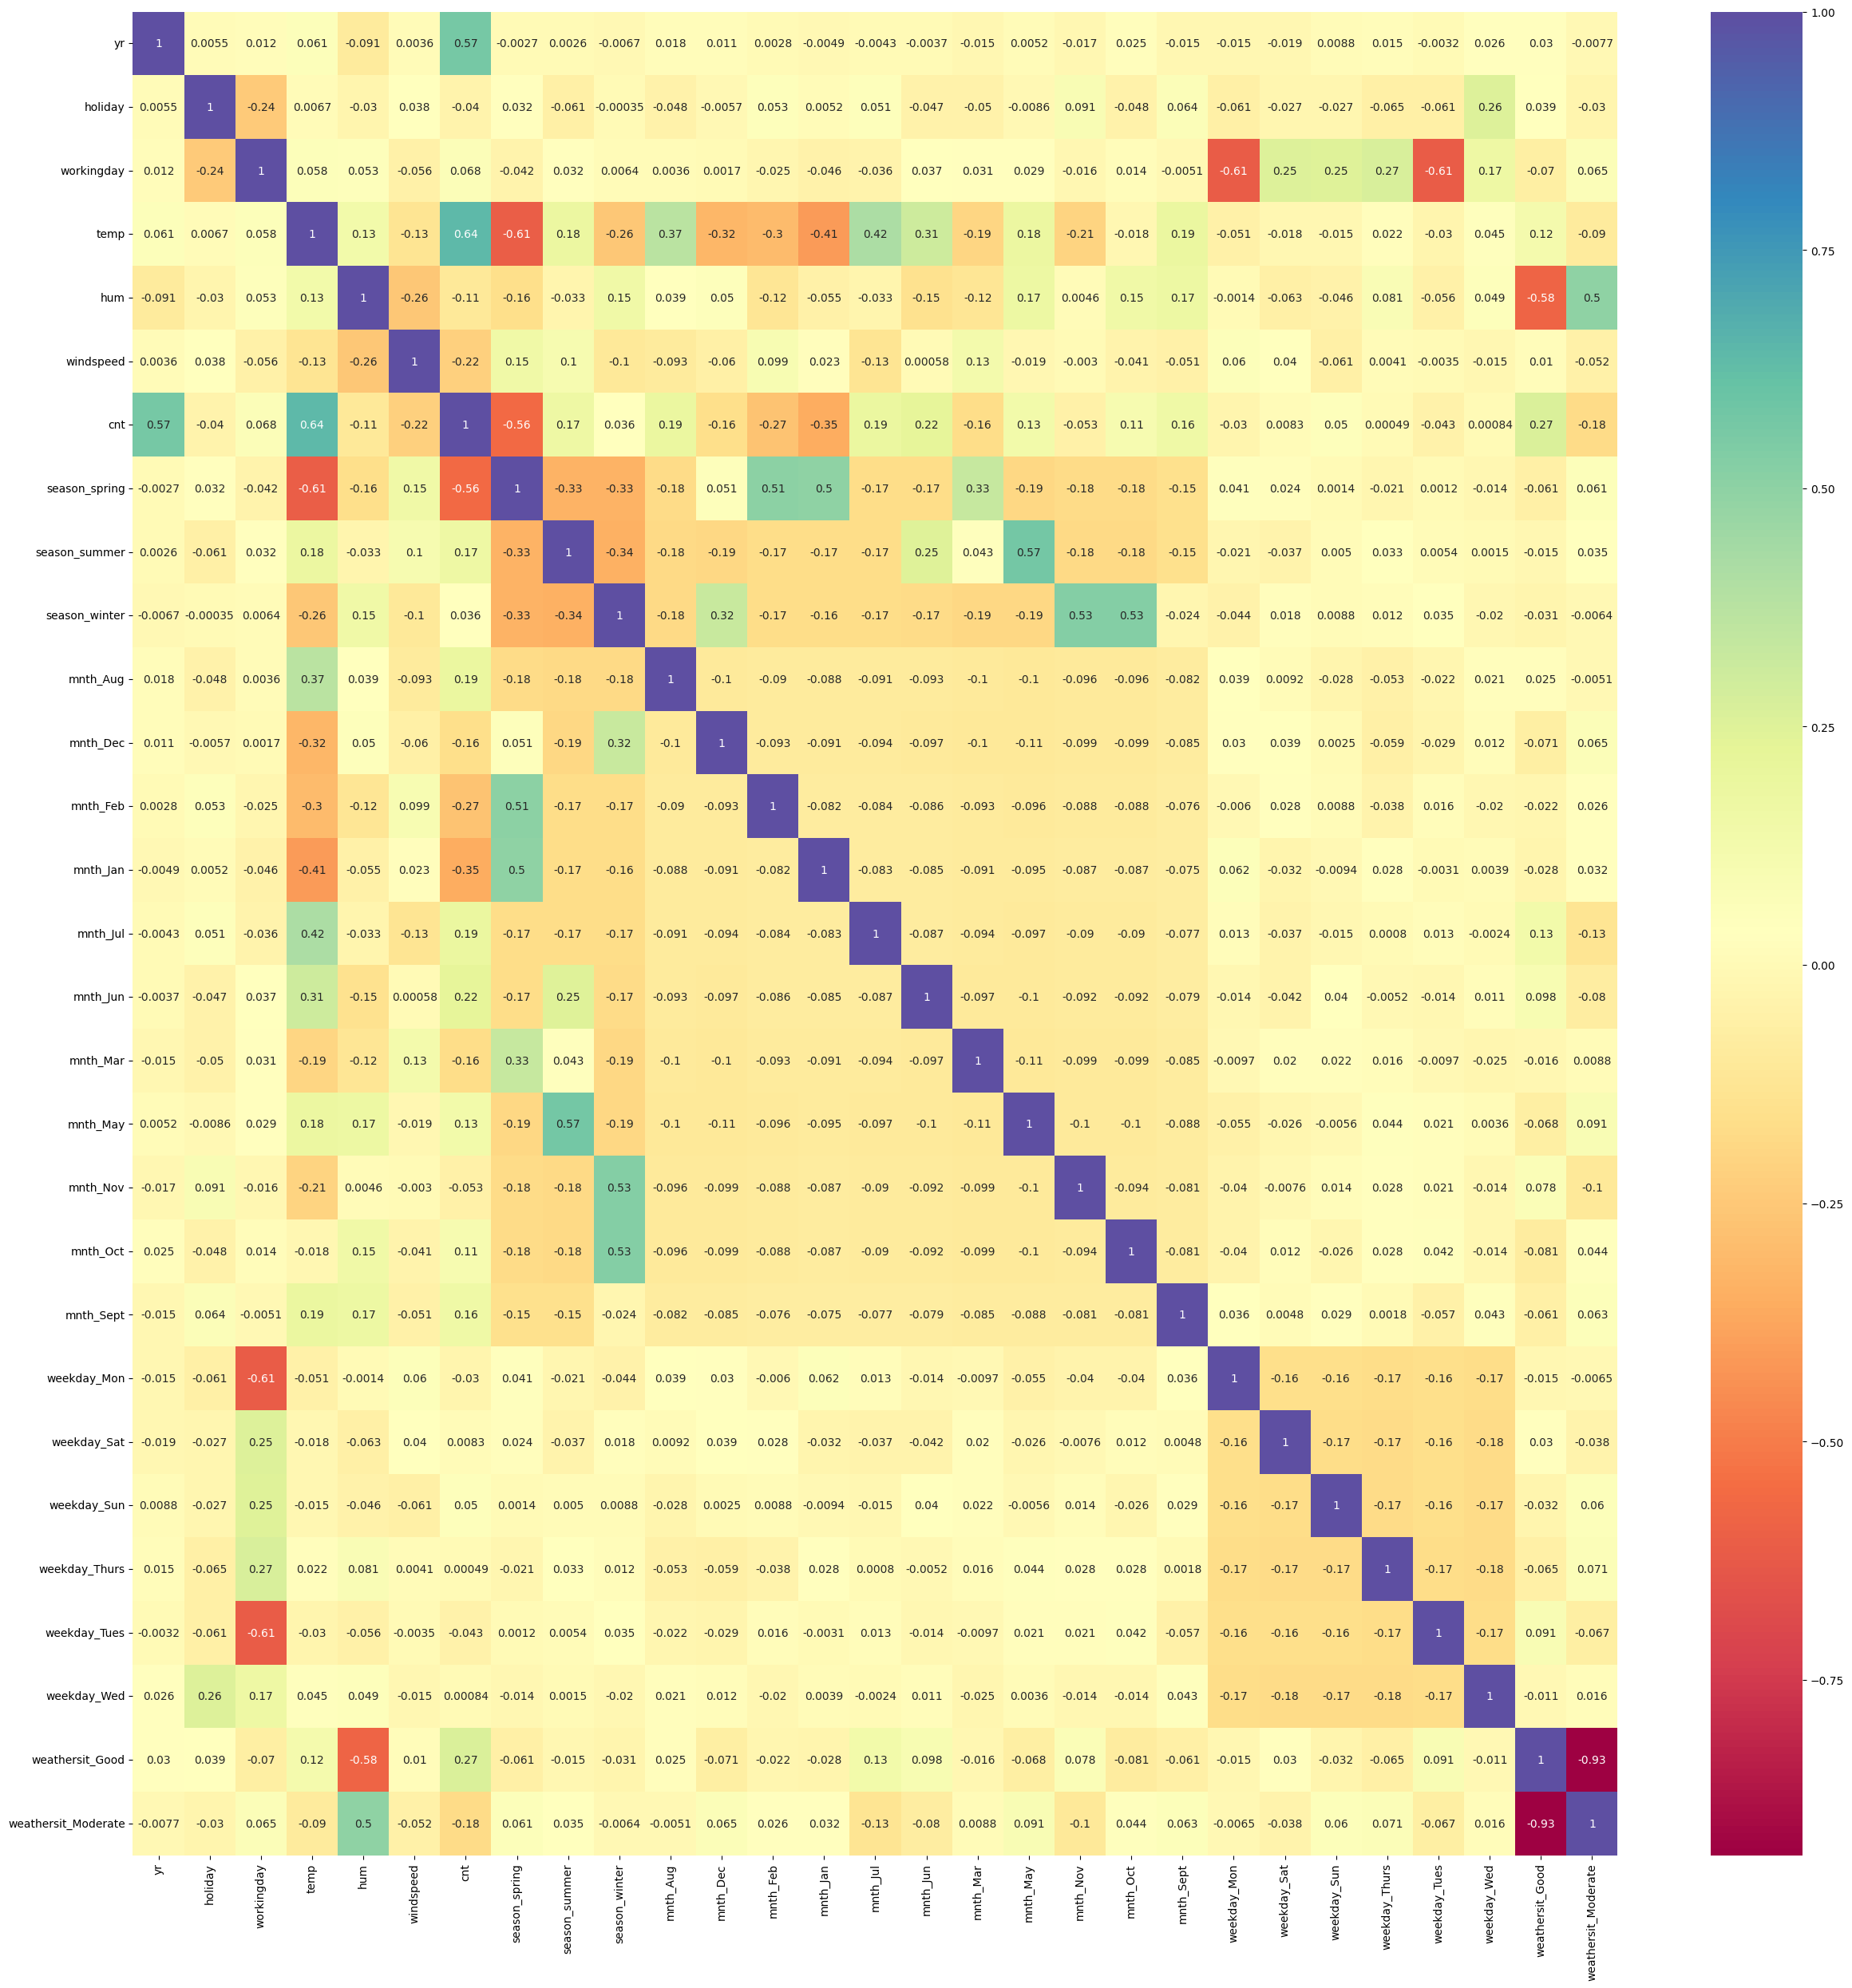

In [52]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="Spectral")
plt.show()

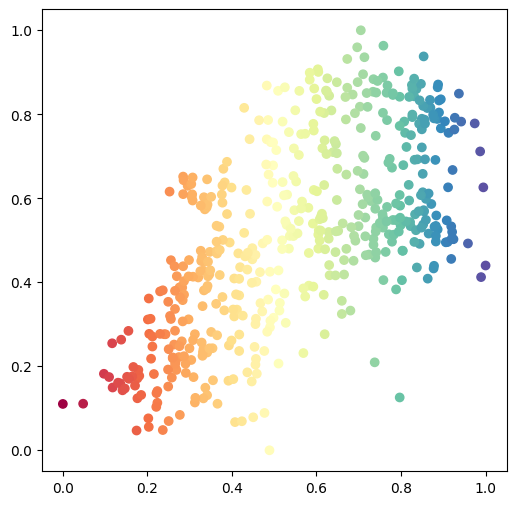

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt, c = df_train.temp, cmap = 'Spectral')
plt.show()

In [54]:
# cnt
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [55]:
# cnt
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Good,weathersit_Moderate
333,0,0,1,0.297810,0.464191,0.632933,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
203,0,0,0,0.983645,0.295119,0.276893,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
279,0,0,1,0.540959,0.569862,0.000000,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
483,1,0,0,0.472266,0.425031,0.240477,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
267,0,0,0,0.702333,0.809794,0.071208,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


### Step 4.2: Re-usable Functions

In [56]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
# The training part of the first sequence => X_train => firstSeq
# The training part of the second sequence => y_train => secondSeq
def generate_linearmodel(firstSeq, secondSeq, cols):
    X_train_sm = sm.add_constant(firstSeq[cols])
    lm = sm.OLS(secondSeq, X_train_sm).fit()
    print(lm.summary())
    return lm

In [57]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
# The training part of the first sequence => X_train => firstSeq
def calculate_vif(firstSeq, cols):
    df1 = firstSeq[cols]

    if 'const' in df1.columns:
      df1 = df1.drop('const',axis=1)

    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print("VIF DETAILS")
    print("-------------------------------------------------------------------------------------")
    print(vif.sort_values(by='VIF', ascending = False))
    #vif = vif.sort_values(by='VIF', ascending = False)
    #vif

In [58]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_actualvspredicted(actual, predicted, scale, dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))

    plt.plot(c, actual, color = "orange", linewidth = 2.5, linestyle = "-")
    plt.plot(c, predicted, color = "blue",  linewidth = 2.5, linestyle = "-")

    # Plot heading
    fig.suptitle('Actual against Predicted - '+dataname, fontsize = 20)

    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

### Step 4.3: Model Creation

#### Step 4.3.1: Model 1 - Using scikit learn

In [59]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [60]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                  0.107442
yr                     0.232662
holiday               -0.002847
workingday             0.044914
temp                   0.449226
hum                   -0.201059
windspeed             -0.191260
season_spring         -0.064998
season_summer          0.023589
season_winter          0.121570
mnth_Aug              -0.005329
mnth_Dec              -0.071399
mnth_Feb              -0.034320
mnth_Jan              -0.059579
mnth_Jul              -0.026843
mnth_Jun               0.018478
mnth_Mar              -0.001068
mnth_May               0.027285
mnth_Nov              -0.075192
mnth_Oct              -0.014361
mnth_Sept              0.059717
weekday_Mon            0.060082
weekday_Sat            0.008141
weekday_Sun            0.008273
weekday_Thurs         -0.012980
weekday_Tues           0.005292
weekday_Wed           -0.017542
weathersit_Good        0.212407
weathersit_Moderate    0.165557
dtype: float64

In [61]:
# Instantiate
lm1 = LinearRegression()

# Fit a line
lm1.fit(X_train, y_train)

LinearRegression()

In [62]:
# Print the coefficients and intercept
print(lm1.coef_)
print(lm1.intercept_)

[ 2.32662280e-01 -9.40365294e+12 -9.40365294e+12  4.20432689e-01
 -1.99659181e-01 -1.85672561e-01 -2.78343082e-01 -1.89229110e-02
 -5.20655305e-02 -4.08136295e-02  1.64402050e-01  2.52849725e-01
  1.35547827e-01  5.18659707e-02  5.60224603e-02  1.15703380e-01
  1.00609578e-01  1.37695312e-01  1.19873047e-01 -2.28271484e-02
 -9.40365294e+12  4.27246094e-02 -1.01684570e-01 -6.39648438e-02
 -9.40365294e+12  4.19921875e-02  2.81738281e-01  2.57324219e-01]
9403652944709.365


In [63]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.70e-184
Time:                        11:25:41   Log-Likelihood:                 536.82
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     482   BIC:                            -899.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1074      0.044      2.463      0.014       0.022       0.193
yr                      0.2327      0.008     29.469      0.000       0.217       0.248
holiday                -0.0028      0.025     -0.113      0.910      -0.052       0.047
workingday              0.0449      0.014      3.302      0.001       0.018       0.072
temp                    0.4492      0.046      9.844      0.000       0.360       0.539
hum                    -0.2011      0.038     -5.236      0.000      -0.277      -0.126
windspeed              -0.1913      0.026     -7.470      0.000      -0.242      -0.141
season_spring          -0.0650      0.030     -2.176      0.030      -0.124      -0.006
season_summer           0.0236      0.025      0.947      0.344      -0.025       0.073
season_winter           0.1216      0.029      4.141      0.000       0.064       0.179
mnth_Aug               -0.0053      0.033     -0.163      0.871      -0.070       0.059
mnth_Dec               -0.0714      0.034     -2.090      0.037      -0.139      -0.004
mnth_Feb               -0.0343      0.033     -1.042      0.298      -0.099       0.030
mnth_Jan               -0.0596      0.035     -1.723      0.086      -0.128       0.008
mnth_Jul               -0.0268      0.034     -0.792      0.429      -0.093       0.040
mnth_Jun                0.0185      0.024      0.767      0.443      -0.029       0.066
mnth_Mar               -0.0011      0.026     -0.041      0.967      -0.052       0.050
mnth_May                0.0273      0.020      1.368      0.172      -0.012       0.066
mnth_Nov               -0.0752      0.037     -2.040      0.042      -0.148      -0.003
mnth_Oct               -0.0144      0.036     -0.402      0.688      -0.084       0.056
mnth_Sept               0.0597      0.032      1.891      0.059      -0.002       0.122
weekday_Mon             0.0601      0.015      3.940      0.000       0.030       0.090
weekday_Sat             0.0081      0.015      0.559      0.576      -0.020       0.037
weekday_Sun             0.0083      0.015      0.563      0.574      -0.021       0.037
weekday_Thurs          -0.0130      0.015     -0.894      0.372      -0.041       0.016
weekday_Tues            0.0053      0.015      0.345      0.730      -0.025       0.035
weekday_Wed            -0.0175      0.015     -1.202      0.230      -0.046       0.011
weathersit_Good         0.2124      0.026      8.292      0.000       0.162       0.263
weathersit_Moderate     0.1656      0.024      6.904      0.000       0.118       0.213
==============================================================================
Omnibus:                       92.144   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.842
Skew:                         

This model has an Adjusted R-squared value of 84.9% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

#### Step 4.3.2: Model 2 - With random 15 features

In [64]:
# RFE with 15 features
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
rfe1 = RFE(estimator = lm1, n_features_to_select = 15)

# Fit with 15 features
rfe1 = rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False  True  True False False
 False  True False False False  True False False  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1 14  1  1  2  5  3  1 10 13  7  1  4  6  1 12 11  9
  1  8  1  1]


In [65]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]
print(col1)
#col1 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weathersit_Good', 'weathersit_Moderate']
#print(col1)

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Jul', 'mnth_Nov',
       'weekday_Mon', 'weekday_Tues', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')


,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Aug,mnth_Jul,mnth_Nov,weekday_Mon,weekday_Tues,weathersit_Good,weathersit_Moderate
707,1.0,1,0,0,0.417140,0.933018,0.243629,0,1,0,0,0,0,1,0,1
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,1,0
14,1.0,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,0,1,0,0,1
204,1.0,0,0,0,0.989306,0.567625,0.267859,0,0,0,1,0,0,1,1,0
182,1.0,0,0,0,0.871664,0.458136,0.150755,0,0,0,1,0,1,0,1,0


In [66]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())
print("_____________________________________________________________________________________________________")
calculate_vif(X_train_rfe1, col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.18e-192
Time:                        11:25:41   Log-Likelihood:                 521.59
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     495   BIC:                            -949.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0981    

Note that the new model built on the selected features doesnt show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from 84.9% to 84.6%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

#### Step 4.3.3: Model 3 - Consider variable from scikit model having pvalue > 0.05

In [67]:
cols = ['holiday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed']

generate_linearmodel(X_train, y_train, cols)
print("_____________________________________________________________________________________________________")
calculate_vif(X_train, cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     20.03
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.68e-44
Time:                        11:25:41   Log-Likelihood:                 168.90
No. Observations:                 510   AIC:                            -303.8
Df Residuals:                     493   BIC:                            -231.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4300      0.022     19.859

#### Step 4.3.4: Model 4 (Subset variables)

In [68]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat',
       'weathersit_Good', 'weathersit_Moderate']

generate_linearmodel(X_train, y_train, cols)
print("_____________________________________________________________________________________________________")
calculate_vif(X_train, cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.16e-191
Time:                        11:25:42   Log-Likelihood:                 518.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0942    

#### Step 4.3.5: Model 5 - 7 Variables

In [69]:
cols = ['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_Good']

lm5 = generate_linearmodel(X_train, y_train, cols)
calculate_vif(X_train, cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     320.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.25e-181
Time:                        11:25:42   Log-Likelihood:                 474.68
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     502   BIC:                            -899.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3772      0.036     

## Step 5: Evaluation

### Step 5.1: Residual Analysis

Choosing Model 5 as the p-values for all variables are 0 and the adjusted r-square is greater than 0.8

In [70]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[cols]

# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 333 to 43
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   temp             219 non-null    float64
 3   hum              219 non-null    float64
 4   windspeed        219 non-null    float64
 5   season_spring    219 non-null    uint8  
 6   mnth_Jul         219 non-null    uint8  
 7   weathersit_Good  219 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 10.9 KB


In [71]:
# Making predictions
y_pred = lm5.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

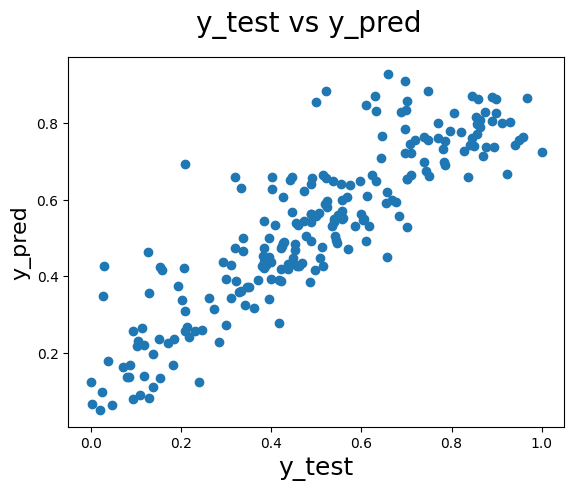

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7502659417764821

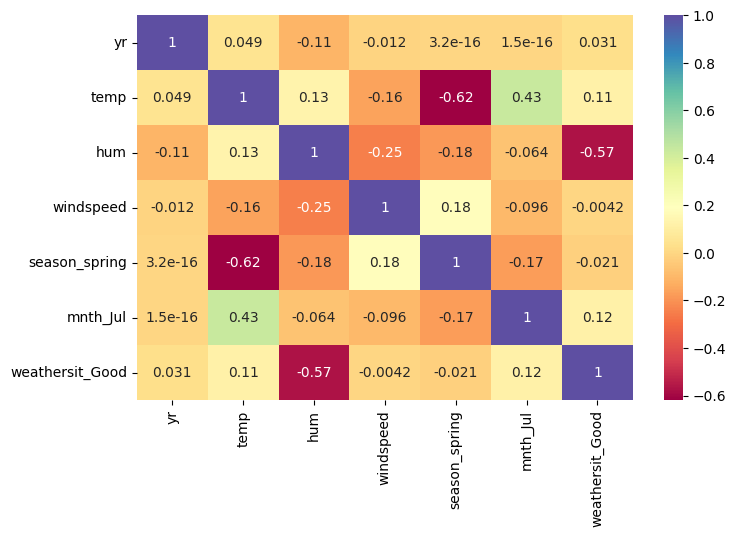

In [74]:
# Figure size
plt.figure(figsize=(8,5))

cols = ['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_Good']
# Heatmap
sns.heatmap(bikesharing_df[cols].corr(), cmap="Spectral", annot=True)
plt.show()

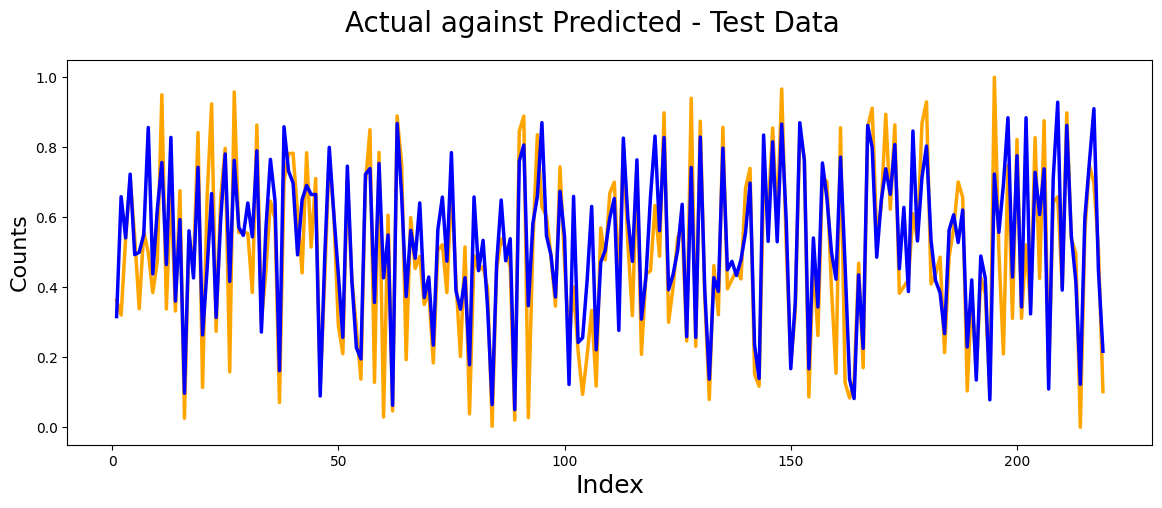

In [75]:
#Plot Actual vs Predicted for Test Data
plot_actualvspredicted(y_test, y_pred, len(y_test)+1, 'Test Data')

#### Step 5.2: Conclusion

1.   Expand business during Spring
2.   Weather situation should be better from July which will help in expansion

